# Book Recommender System: Data Exploration and Cleaning

This notebook performs comprehensive data exploration and cleaning on the "7k Books with Metadata" dataset from Kaggle. The goal is to prepare high-quality data for building a content-based book recommendation system.

## 1. Data Acquisition

In [1]:
# Download the "7k Books with Metadata" dataset from Kaggle using kagglehub
# This will fetch the latest version of the dataset and return the local path
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)

Path to dataset files: /Users/zoro/.cache/kagglehub/datasets/dylanjcastillo/7k-books-with-metadata/versions/3


In [2]:
# Load the books dataset from the CSV file into a pandas DataFrame
# Display the first 5 rows to get an initial overview of the data structure and content
import pandas as pd
books = pd.read_csv(f"{path}/books.csv")
books.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


## 2. Initial Data Exploration

In [3]:
# Import visualization libraries for creating plots and heatmaps
# Seaborn provides high-level statistical graphics, matplotlib handles plotting
import seaborn as sns
import matplotlib.pyplot as plt

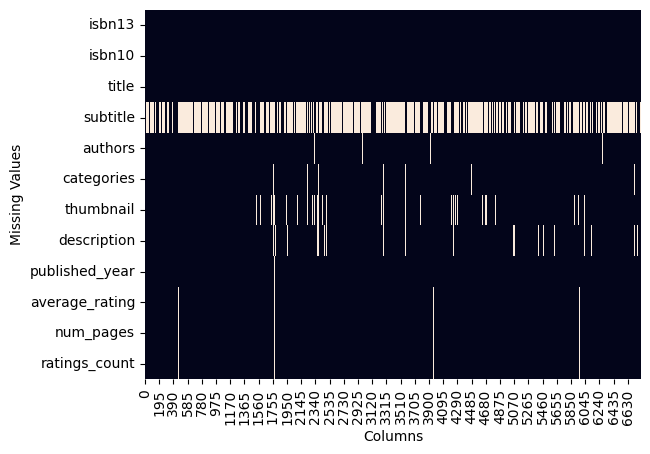

In [4]:
# Visualize missing data patterns in the books dataset
# Create a heatmap showing which columns have missing values (NaN) across all rows
# This helps identify data quality issues and decide how to handle missing values
ax = plt.axes()
sns.heatmap(books.isna().transpose(), cbar=False, ax=ax)

plt.xlabel("Columns")
plt.ylabel("Missing Values")

plt.show()

### 2.1 Missing Data Analysis

In [5]:
# Feature engineering: Create two new columns to help analyze the dataset
# 1. missing_description: Binary indicator (1 if description is missing, 0 otherwise)
# 2. age_of_book: Calculate book age by subtracting published year from current year (2026)
import numpy as np

books["missing_description"] = np.where(books["description"].isna(), 1, 0)
books["age_of_book"] = 2026 - books["published_year"]

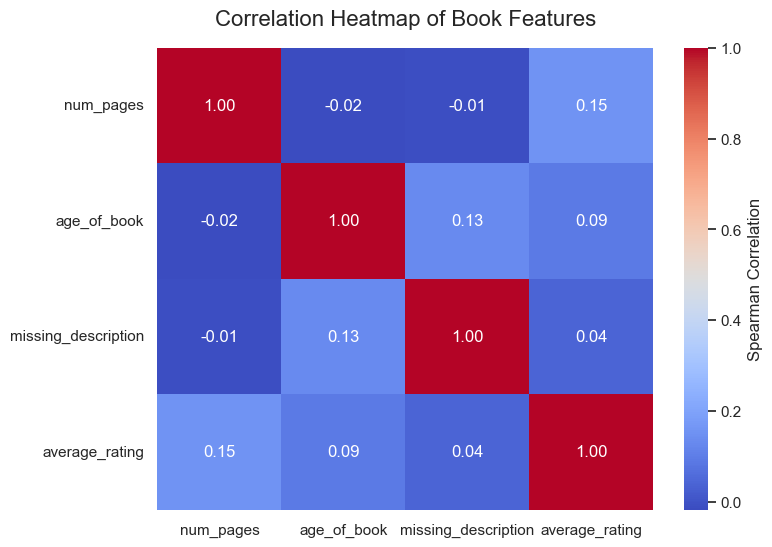

In [6]:
# Analyze correlations between key book features using Spearman correlation
# Spearman correlation is used because it captures monotonic (not just linear) relationships
# The heatmap visualizes how features like page count, book age, missing descriptions, and ratings relate to each other
# This helps identify which features might be important for the book recommender system
columns_pf_interest = ["num_pages", "age_of_book", "missing_description", "average_rating"]

correlation_matrix = books[columns_pf_interest].corr(method = "spearman")

sns.set_theme(style="white")
plt.figure(figsize=(8, 6))

heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
                        cbar_kws={"label": "Spearman Correlation"})

heatmap.set_title("Correlation Heatmap of Book Features", fontdict={"fontsize":16}, pad=16)

plt.show()

### 2.2 Feature Correlation Analysis

In [7]:
# Data cleaning: Filter out books with missing critical information
# Remove books that lack description, page count, average rating, or published year
# This creates a cleaner dataset for building the recommendation system
book_missing = books[~(books["description"].isna()) &
      ~(books["num_pages"].isna()) &
      ~(books["average_rating"].isna()) &
      ~(books["published_year"].isna())
]

## 3. Data Cleaning and Quality Assessment

In [8]:
# Display the cleaned dataset to verify that books with missing values have been removed
book_missing

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,22.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,26.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,44.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,33.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,24.0
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,23.0
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,27.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0,0,45.0


In [9]:
# Explore the distribution of book categories in the cleaned dataset
# Count how many books belong to each category and sort by frequency (most common first)
# This helps understand the genre distribution and potential category biases
book_missing["categories"].value_counts().reset_index().sort_values("count", ascending=False)

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
280,Brothers and sisters,1
279,"Banks and banking, British",1
278,Rock musicians,1
277,Community life,1


In [10]:
# Analyze description quality by counting the number of words in each book's description
# This metric helps identify potentially low-quality or inadequate descriptions
# Longer descriptions typically provide more context for content-based recommendations
book_missing["words_in_description"] = book_missing["description"].str.split().str.len()

### 3.1 Description Quality Analysis

In [11]:
# Display the dataset with the new words_in_description column
# Verify that the word count feature has been added correctly
book_missing

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,22.0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,26.0,205
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,44.0,14
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,33.0,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,24.0,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,24.0,63
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,23.0,117
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,27.0,174
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0,0,45.0,245


In [12]:
# Examine very short descriptions (1-4 words)
# These extremely brief descriptions may lack sufficient information for recommendations
book_missing.loc[book_missing["words_in_description"].between(1, 4), "description"]

6                                           Donation.
11                                     Fantasy-roman.
748              Includes bibliographical references.
770                             Bound For Oregon (PB)
775                                No Marketing Blurb
812                                No Marketing Blurb
857                          First published in 1813.
944                         Edited by Maurice Hindle.
953                        DEFOE/ROBINSON CRUSOE (BC)
954                             Edited by John Carey.
962                         ALLEN/GETTING THINGS DONE
1054                            GILBERT/EAT PRAY LOVE
1056    "Graham Greene centennial, 1904-2004"--Cover.
1060                   STEINBECK/GRAPES OF WRATH (BC)
1346                                   Fantasy-roman.
1546                                      Winter 2003
1610                                      Winter 1999
1813                             National bestseller.
1981                        

In [13]:
# Examine short descriptions (5-10 words)
# Check if these provide more useful information than the very short descriptions
book_missing.loc[book_missing["words_in_description"].between(5, 10), "description"]

77                         Nonsense rhyming story. 4 yrs+
104                        Library of Liberal Arts title.
241     Originally published: [New York]: Clarion Book...
357     The most eloquent translation of Homer's Odyss...
472     A study of the influence Romanticism exerts up...
                              ...                        
6558    A moving anthology of correspondence between G...
6704      Accessible and affordable illustrated biography
6726       Presents two complete novels from Henry James.
6757                          Audio Book- unabriged on CD
6795    Book Of Five Rings is a Kodansha International...
Name: description, Length: 102, dtype: str

In [14]:
# Examine medium-length descriptions (15-25 words)
# Assess if this range provides adequate detail for content-based filtering
book_missing.loc[book_missing["words_in_description"].between(15, 25), "description"]

10      One of Sidney Sheldon's most popular and bests...
32      Tells the story of three generations of Chines...
36      A magical and fantastic collection of early st...
57      A young drifter finds more than he bargained f...
68      A new 'The Doors of Perception' for the 21st c...
                              ...                        
6767    Everything from the fingerprints of the gods t...
6782    Displays one of America's leading physicist's ...
6783    Basics Illustration 01: Thinking Visually expl...
6789    Provides an introduction to the American artis...
6809    This is a jubilant and rewarding collection of...
Name: description, Length: 1056, dtype: str

In [15]:
# Examine longer descriptions (25-35 words)
# These longer descriptions likely contain richer context for recommendation algorithms
book_missing.loc[book_missing["words_in_description"].between(25, 35), "description"]

9       Kate Blackwell is an enigma and one of the mos...
14      Available in the U.S. for the first time, this...
20      It is 1937, and Charles Ashworth, a Canon to t...
21      Reissue of the author's most famous and well-l...
46      No one believes a little girl when she insists...
                              ...                        
6760    Joel, an English teacher, has never really lik...
6766    Discusses the historical and intellectual back...
6775    Presents nearly one thousand recipes--from app...
6779    Edited by the creator and executive producer o...
6799    This book is the story of a young girl obsesse...
Name: description, Length: 1372, dtype: str

In [16]:
# Filter the dataset to keep only books with descriptions of 25 words or more
# This ensures we have sufficient textual content for content-based recommendations
book_missing_25_words = book_missing.loc[book_missing["words_in_description"] >= 25]

In [17]:
# Display the filtered dataset with only books that have adequate descriptions (25+ words)
book_missing_25_words

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,22.0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,26.0,205
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,33.0,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,24.0,45
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,24.0,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,23.0,288
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,24.0,63
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,23.0,117
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,27.0,174


## 4. Feature Engineering for Recommendation System

In [18]:
# Create a combined title field that includes subtitles when available
# If subtitle exists, concatenate it with title using ': ' separator
# If no subtitle, use only the title - this provides complete book identification
book_missing_25_words["title_and_subtitle"] = (
    np.where(book_missing_25_words["subtitle"].isna(), 
             book_missing_25_words["title"], 
             book_missing_25_words[["title", "subtitle"]].fillna('').astype(str).agg(': '.join, axis=1))
)

In [19]:
# Verify that the title_and_subtitle column has been created successfully
book_missing_25_words

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description,title_and_subtitle
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,22.0,199,Gilead
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,26.0,205,Spider's Web: A Novel
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,33.0,57,Rage of angels
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,24.0,45,The Four Loves
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,24.0,75,The Problem of Pain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,23.0,288,Mistaken Identity
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,24.0,63,Journey to the East
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,23.0,117,The Monk Who Sold His Ferrari: A Fable About F...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,27.0,174,I Am that: Talks with Sri Nisargadatta Maharaj


In [20]:
# Create a tagged description by combining ISBN13 with the description text
# This helps uniquely identify each book's description in downstream NLP processing
book_missing_25_words["tagged_description"] = book_missing_25_words[["isbn13", "description"]].astype(str).agg(' '.join, axis=1)

In [21]:
# Verify that the tagged_description column has been added successfully
book_missing_25_words

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description,title_and_subtitle,tagged_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,22.0,199,Gilead,9780002005883 A NOVEL THAT READERS and critics...
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,26.0,205,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,33.0,57,Rage of angels,"9780006178736 A memorable, mesmerizing heroine..."
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,24.0,45,The Four Loves,9780006280897 Lewis' work on the nature of lov...
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,24.0,75,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,23.0,288,Mistaken Identity,9788172235222 On A Train Journey Home To North...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,24.0,63,Journey to the East,9788173031014 This book tells the tale of a ma...
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,23.0,117,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623 Wisdom to Create a Life of Passi...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,27.0,174,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...


## 5. Exporting Cleaned Dataset

In [22]:
# Export the final cleaned dataset to CSV file
# Remove temporary columns that were only needed for analysis: subtitle, missing_description, age_of_book, words_in_description
# Save the remaining columns to 'books_cleaned.csv' for use in the recommendation system
(
    book_missing_25_words
        .drop(["subtitle", "missing_description", "age_of_book", "words_in_description"], axis=1)
        .to_csv("books_cleaned.csv", index=False)
)

## 6. Building the Semantic Recommendation System

The following sections will use LangChain and OpenAI embeddings to build a vector-based semantic search system that can recommend books based on natural language queries.

### 6.1 Environment Setup and Data Loading

In [ ]:
# Import LangChain libraries for document processing and vector storage
# TextLoader: Loads text files, CharacterTextSplitter: Splits text into chunks
# OpenAIEmbeddings: Generates vector embeddings, Chroma: Vector database for similarity search
from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import CharacterTextSplitter
from langchain_openai import OpenAIEmbeddings
from langchain_chroma import Chroma

In [ ]:
# Load environment variables (OpenAI API key) from .env file
# This is required for using OpenAI embeddings in the semantic search system
from dotenv import load_dotenv
load_dotenv()

True

In [ ]:
# Import pandas for DataFrame operations
import pandas as pd

In [ ]:
# Load the cleaned books dataset from CSV for use in semantic search
books = pd.read_csv("books_cleaned.csv")
books

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,Gilead,9780002005883 A NOVEL THAT READERS and critics...
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,Rage of angels,"9780006178736 A memorable, mesmerizing heroine..."
3,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,The Four Loves,9780006280897 Lewis' work on the nature of lov...
4,9780006280934,0006280935,The Problem of Pain,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5192,9788172235222,8172235224,Mistaken Identity,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,Mistaken Identity,9788172235222 On A Train Journey Home To North...
5193,9788173031014,8173031010,Journey to the East,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,Journey to the East,9788173031014 This book tells the tale of a ma...
5194,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623 Wisdom to Create a Life of Passi...
5195,9788185300535,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...


### 6.2 Document Preparation for Vector Embeddings

In [ ]:
# Export tagged descriptions to a text file (one description per line)
# This file will be used as input for the document loader and text splitter
books["tagged_description"].to_csv("tagged_descriptions.text", sep="\n", index=False, header=False)

In [28]:
# Load the tagged descriptions file
raw_documents = TextLoader("tagged_descriptions.text").load()

# Set chunk_size to a large integer value (1000000 characters) to ensure each line is kept as a single chunk
# The separator "\n" will split the text at newlines, creating one document per line
text_splitter = CharacterTextSplitter(chunk_size=1, chunk_overlap=0, separator="\n")

documents = text_splitter.split_documents(raw_documents)

Created a chunk of size 1168, which is longer than the specified 1
Created a chunk of size 1214, which is longer than the specified 1
Created a chunk of size 373, which is longer than the specified 1
Created a chunk of size 309, which is longer than the specified 1
Created a chunk of size 483, which is longer than the specified 1
Created a chunk of size 482, which is longer than the specified 1
Created a chunk of size 960, which is longer than the specified 1
Created a chunk of size 188, which is longer than the specified 1
Created a chunk of size 843, which is longer than the specified 1
Created a chunk of size 296, which is longer than the specified 1
Created a chunk of size 197, which is longer than the specified 1
Created a chunk of size 881, which is longer than the specified 1
Created a chunk of size 1088, which is longer than the specified 1
Created a chunk of size 1189, which is longer than the specified 1
Created a chunk of size 304, which is longer than the specified 1
Create

In [29]:
# Verify that the text has been split into separate documents (one per line/book description)
documents[:20]

[Document(metadata={'source': 'tagged_descriptions.text'}, page_content='9780002005883 A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details,

### 6.3 Creating the Vector Database

In [ ]:
# Create a Chroma vector database from the documents using OpenAI embeddings
# This enables semantic similarity search based on the meaning of book descriptions
db_books = Chroma.from_documents(documents, embedding=OpenAIEmbeddings())

### 6.4 Testing Semantic Search

In [ ]:
# Test the vector database with a sample query
# Search for the top 10 most semantically similar book descriptions
query = "A book to teach children about nature"
docs = db_books.similarity_search(query, k=10)
docs

[Document(id='af085706-8542-4205-91b6-b73ee2d4e67c', metadata={'source': 'tagged_descriptions.text'}, page_content='9780786808069 Children will discover the exciting world of their own backyard in this introduction to familiar animals from cats and dogs to bugs and frogs. The combination of photographs, illustrations, and fun facts make this an accessible and delightful learning experience.'),
 Document(id='19a31349-b313-4439-872d-2375814c2aa5', metadata={'source': 'tagged_descriptions.text'}, page_content="9780786808380 Introduce your babies to birds, cats, dogs, and babies through fine art, illustration, and photographs. These books are a rare opportunity to expose little ones to a range of images on a single subject, from simple child's drawings and abstract art to playful photos. A brief text accompanies each image, introducing the baby to some basic -- and sometimes playful -- information about the subjects."),
 Document(id='72e324da-d084-4811-91a4-596c4b6978d2', metadata={'source

In [ ]:
# Extract and display the full book details for the top search result
# Parse the ISBN13 from the document content and look it up in the books DataFrame
books[books["isbn13"] == int(docs[0].page_content.split()[0].strip())]

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description
3747,9780786808069,0786808063,Baby Einstein: Neighborhood Animals,Marilyn Singer;Julie Aigner-Clark,Juvenile Fiction,http://books.google.com/books/content?id=X9a4P...,Children will discover the exciting world of t...,2001.0,3.89,16.0,180.0,Baby Einstein: Neighborhood Animals,9780786808069 Children will discover the excit...


In [33]:
# Function to retrieve semantic book recommendations based on a query
def retrieve_semantic_reccomendations(query: str, top_k: int=10) -> pd.DataFrame:
    # Get top 50 similar documents from the vector database
    recs = db_books.similarity_search(query, k=50)
    
    # Extract ISBN13 numbers from the search results
    books_list = []
    for i in range(0, len(recs)):
        books_list += [int(recs[i].page_content.strip('"').split()[0])]
    
    # Filter books DataFrame by ISBN list and return top_k results
    return books[books["isbn13"].isin(books_list)].head(top_k)

### 6.5 Building the Recommendation Function

In [ ]:
# Test the recommendation function with a sample query
# This should return the top 10 books related to space exploration
retrieve_semantic_reccomendations("A book about space exploration")

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description
116,9780060510862,0060510862,The Forever War,Joe Haldeman,Fiction,http://books.google.com/books/content?id=jc1eC...,Drafted into the ranks of Earth's interstellar...,2003.0,4.15,278.0,103375.0,The Forever War,9780060510862 Drafted into the ranks of Earth'...
549,9780131871656,013187165X,Astronomy,Eric Chaisson;Stephen McMillan,Mathematics,http://books.google.com/books/content?id=1O00A...,This introduction to astronomy features an exc...,2006.0,3.85,499.0,153.0,Astronomy: a beginner's guide to the universe,9780131871656 This introduction to astronomy f...
816,9780142402931,0142402931,The Far Side of Evil,Sylvia Engdahl,Juvenile Fiction,http://books.google.com/books/content?id=7nijj...,A young girl from an advanced civilization is ...,2005.0,3.98,324.0,57.0,The Far Side of Evil,9780142402931 A young girl from an advanced ci...
833,9780142500378,0142500372,Enchantress from the Stars,Sylvia Louise Engdahl,Juvenile Fiction,http://books.google.com/books/content?id=rntJA...,When young Elana unexpectedly joins the team l...,2003.0,3.94,304.0,2031.0,Enchantress from the Stars,9780142500378 When young Elana unexpectedly jo...
930,9780156306300,0156306301,Fiasco,Stanislaw Lem,Fiction,http://books.google.com/books/content?id=4IZ3P...,When a crew of earthmen--among them a space pi...,1988.0,4.12,322.0,2125.0,Fiasco,9780156306300 When a crew of earthmen--among t...
1271,9780312852535,0312852533,The Humanoids,Jack Williamson,Fiction,http://books.google.com/books/content?id=vPSl0...,A classic science fiction novel features human...,1996.0,3.75,299.0,880.0,The Humanoids: A Novel,9780312852535 A classic science fiction novel ...
1276,9780312864743,0312864744,Ports of Call,Jack Vance,Fiction,http://books.google.com/books/content?id=_Zu4S...,A romantic tale follows a space swashbuckler a...,1999.0,3.53,300.0,395.0,Ports of Call,9780312864743 A romantic tale follows a space ...
1288,9780312890216,0312890214,The Starry Rift,James Tiptree,Fiction,NaN,This novel set in the far-future and filled wi...,1994.0,3.82,250.0,220.0,The Starry Rift,9780312890216 This novel set in the far-future...
1351,9780316281331,0316281336,"The World Treasury of Physics, Astronomy, and ...",Timothy Ferris;Clifton Fadiman,Education,http://books.google.com/books/content?id=zryXG...,The writings of more than 60 authors including...,1993.0,4.12,859.0,361.0,"The World Treasury of Physics, Astronomy, and ...",9780316281331 The writings of more than 60 aut...
1387,9780330340328,0330340328,The Reality Dysfunction,Peter F. Hamilton,English fiction,http://books.google.com/books/content?id=uOqwr...,In AD 2600 the human race is finally beginning...,1997.0,4.14,1223.0,26269.0,The Reality Dysfunction,9780330340328 In AD 2600 the human race is fin...


## 7. Zero-Shot Category Classification

In this section, we use a zero-shot classification model to automatically categorize books that don't have assigned categories, helping to expand our categorized dataset.

In [ ]:
# Count and display the distribution of all categories in the dataset
# This helps understand which categories are most common
books["categories"].value_counts().reset_index()

,categories,count
0,Fiction,2111
1,Juvenile Fiction,390
2,Biography & Autobiography,311
3,History,207
4,Literary Criticism,124
...,...,...
474,Meditation,1
475,Gay men,1
476,Christian fiction,1
477,"Napoleonic Wars, 1800-1815",1


### 7.1 Category Analysis and Simplification

In [ ]:
# Filter to show only categories with more than 50 books
# This identifies the major categories that have sufficient representation
books["categories"].value_counts().reset_index().query("count > 50")

,categories,count
0,Fiction,2111
1,Juvenile Fiction,390
2,Biography & Autobiography,311
3,History,207
4,Literary Criticism,124
5,Philosophy,117
6,Religion,117
7,Comics & Graphic Novels,116
8,Drama,86
9,Juvenile Nonfiction,57


In [ ]:
# Examine books in the "Religion" category to understand category characteristics
books[books["categories"] == "Religion" ]

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description
184,9780060609177,0060609176,Meeting Jesus Again for the First Time,Marcus J. Borg,Religion,http://books.google.com/books/content?id=-_ieW...,Of the many recent books on the historical Jes...,1995.0,4.14,160.0,3998.0,Meeting Jesus Again for the First Time: The Hi...,9780060609177 Of the many recent books on the ...
185,9780060609191,0060609192,Reading the Bible Again for the First Time,Marcus J. Borg,Religion,http://books.google.com/books/content?id=pf0ml...,One of the vital challenges facing thoughtful ...,2002.0,4.13,321.0,2875.0,Reading the Bible Again for the First Time: Ta...,9780060609191 One of the vital challenges faci...
186,9780060622138,006062213X,Shadow of the Almighty,Elisabeth Elliot,Religion,http://books.google.com/books/content?id=QQCG9...,The bestselling account of the martyrdom of Ji...,1989.0,4.39,272.0,6658.0,Shadow of the Almighty: The Life and Testament...,9780060622138 The bestselling account of the m...
187,9780060645892,006064589X,The Dance of the Dissident Daughter,Sue Monk Kidd,Religion,http://books.google.com/books/content?id=0FV3J...,The acclaimed spiritual memoir from the author...,2002.0,3.96,256.0,5319.0,The Dance of the Dissident Daughter,9780060645892 The acclaimed spiritual memoir f...
188,9780060652852,0060652853,C.S. Lewis,C. S. Lewis,Religion,http://books.google.com/books/content?id=vtr4N...,Known throughout the world as the intellect be...,1996.0,4.31,176.0,255.0,C.S. Lewis: Readings for Meditation and Reflec...,9780060652852 Known throughout the world as th...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4868,9781592572229,1592572227,The Complete Idiot's Guide to World Religions,Brandon Toropov;Luke Buckles,Religion,http://books.google.com/books/content?id=ZPokH...,Presents an overview of the world's major reli...,2004.0,3.66,405.0,159.0,The Complete Idiot's Guide to World Religions,9781592572229 Presents an overview of the worl...
4909,9781594489426,1594489424,Grace (eventually),Anne Lamott,Religion,http://books.google.com/books/content?id=mIZbC...,"Wherever you look, there's trouble and wonder,...",2007.0,3.98,255.0,13718.0,Grace (eventually): Thoughts on Faith,"9781594489426 Wherever you look, there's troub..."
4935,9781597818704,1597818704,Marilyn Manson,Richard D. Nelson,Religion,http://books.google.com/books/content?id=widCE...,"""There are many Christian haters this I know, ...",2006.0,4.00,224.0,3.0,Marilyn Manson: The Lonely Watchman,"9781597818704 ""There are many Christian haters..."
5100,9781889032207,1889032204,Teach Them Diligently,Louis Paul Priolo,Religion,http://books.google.com/books/content?id=VHL3A...,The bookshelves in your home no doubt contain ...,2000.0,4.24,162.0,294.0,Teach Them Diligently: How to Use the Scriptur...,9781889032207 The bookshelves in your home no ...


In [ ]:
# Create a simplified category system by mapping detailed categories to broader groups
# This reduces complexity: Fiction, Nonfiction, Children's Fiction, and Children's Nonfiction
# Makes it easier to classify books and build category-based features
category_mappings = {
    'Fiction': "Fiction",
    'Juvenile Fiction': "Children's Fiction",
    'Biography & Autobiography': "Nonfiction",
    'History': "Nonfiction",
    'Literary Criticism': "Nonfiction",
    'Philosophy': "Nonfiction",
    'Religion': "Nonfiction",
    'Comics & Graphic Novels': "Fiction",
    'Drama': "Fiction",
    'Juvenile Nonfiction': "Children's Nonfiction",
    'Science': "Nonfiction",
    'Poetry': "Fiction",
}

books["simple_category"] = books["categories"].map(category_mappings)

In [ ]:
# Display the books DataFrame with the new simple_category column
books

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description,simple_category
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,Gilead,9780002005883 A NOVEL THAT READERS and critics...,Fiction
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...,NaN
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,Rage of angels,"9780006178736 A memorable, mesmerizing heroine...",Fiction
3,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,The Four Loves,9780006280897 Lewis' work on the nature of lov...,NaN
4,9780006280934,0006280935,The Problem of Pain,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5192,9788172235222,8172235224,Mistaken Identity,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,Mistaken Identity,9788172235222 On A Train Journey Home To North...,NaN
5193,9788173031014,8173031010,Journey to the East,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,Journey to the East,9788173031014 This book tells the tale of a ma...,NaN
5194,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623 Wisdom to Create a Life of Passi...,NaN
5195,9788185300535,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...,Nonfiction


In [ ]:
# Filter to show only books that have been assigned a simple category
# Books with missing simple_category will need to be classified using the zero-shot model
books[~(books["simple_category"].isna())]

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description,simple_category
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,Gilead,9780002005883 A NOVEL THAT READERS and critics...,Fiction
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,Rage of angels,"9780006178736 A memorable, mesmerizing heroine...",Fiction
8,9780006482079,0006482074,Warhost of Vastmark,Janny Wurts,Fiction,http://books.google.com/books/content?id=uOL0f...,"Tricked once more by his wily half-brother, Ly...",1995.0,4.03,522.0,2966.0,Warhost of Vastmark,9780006482079 Tricked once more by his wily ha...,Fiction
30,9780006646006,000664600X,Ocean Star Express,Mark Haddon;Peter Sutton,Juvenile Fiction,http://books.google.com/books/content?id=I2QZA...,Joe and his parents are enjoying a summer holi...,2002.0,3.50,32.0,1.0,Ocean Star Express,9780006646006 Joe and his parents are enjoying...,Children's Fiction
46,9780007121014,0007121016,Taken at the Flood,Agatha Christie,Fiction,http://books.google.com/books/content?id=3gWlx...,A Few Weeks After Marrying An Attractive Young...,2002.0,3.71,352.0,8852.0,Taken at the Flood,9780007121014 A Few Weeks After Marrying An At...,Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5178,9781933648279,1933648279,Night Has a Thousand Eyes,Cornell Woolrich,Fiction,http://books.google.com/books/content?id=3Gk6s...,"""Cornell Woolrich's novels define the essence ...",2007.0,3.77,344.0,680.0,Night Has a Thousand Eyes,"9781933648279 ""Cornell Woolrich's novels defin...",Fiction
5188,9784770028969,4770028962,Coin Locker Babies,村上龍,Fiction,http://books.google.com/books/content?id=87DJw...,Rescued from the lockers in which they were le...,2002.0,3.75,393.0,5560.0,Coin Locker Babies,9784770028969 Rescued from the lockers in whic...,Fiction
5189,9788122200850,8122200850,"Cry, the Peacock",Anita Desai,Fiction,http://books.google.com/books/content?id=_QKwV...,This book is the story of a young girl obsesse...,1980.0,3.22,218.0,134.0,"Cry, the Peacock",9788122200850 This book is the story of a youn...,Fiction
5195,9788185300535,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...,Nonfiction


### 7.2 Setting Up the Zero-Shot Classification Model

In [143]:
from transformers import pipeline

# Use more descriptive labels to help the model better understand the classification task
fiction_categories = ["Fiction", "Nonfiction"]

classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli", device="mps")

Device set to use mps


In [ ]:
# Extract a sample Fiction book description for testing the classifier
sequence = books.loc[books["simple_category"] == "Fiction", "description"].reset_index(drop=True)[200]

In [ ]:
# Test the classifier on a sample Fiction description
# Returns the predicted labels and confidence scores
classifier(sequence, fiction_categories)

{'sequence': 'On the eve of World War II in the Egyptian city of Alexandria, an exiled Irish schoolteacher becomes involved with Justine, the Jewish wife of a Coptic Christian',
 'labels': ['Nonfiction', 'Fiction'],
 'scores': [0.5268184542655945, 0.4731815457344055]}

In [ ]:
# Extract the highest confidence prediction from the classifier results
# This demonstrates how to programmatically get the most likely category
max_index = np.argmax(classifier(sequence, fiction_categories)["scores"])
max_label = classifier(sequence, fiction_categories)["labels"][max_index]
max_label

'Nonfiction'

In [158]:
# def generate_predictions(sequence, categories):
#     predictions = classifier(sequence, categories)
#     max_index = np.argmax(predictions["scores"])
#     max_label = predictions["labels"][max_index]
#     return max_label


def generate_predictions(sequence, categories):
    predictions = classifier(
        sequence, categories, hypothesis_template="This is a {} book."
    )
    max_index = np.argmax(predictions["scores"])
    max_label = predictions["labels"][max_index]
    return max_label

### 7.3 Model Validation and Testing

In [159]:
# Test on a few known examples to see if it works
# Test Nonfiction
Nonfiction_desc = books.loc[
    books["simple_category"] == "Nonfiction", "description"
].reset_index(drop=True)[0]
result = classifier(
    Nonfiction_desc, fiction_categories, hypothesis_template="This is a {} book."
)
print("Nonfiction test:")
print(f"Labels: {result['labels']}")
print(f"Scores: {result['scores']}\n")

# Test Fiction
fiction_desc = books.loc[
    books["simple_category"] == "Fiction", "description"
].reset_index(drop=True)[0]
result = classifier(
    fiction_desc, fiction_categories, hypothesis_template="This is a {} book."
)
print("Fiction test:")
print(f"Labels: {result['labels']}")
print(f"Scores: {result['scores']}")

Nonfiction test:
Labels: ['Nonfiction', 'Fiction']
Scores: [0.7182425260543823, 0.28175750374794006]

Fiction test:
Labels: ['Fiction', 'Nonfiction']
Scores: [0.698727011680603, 0.3012729585170746]


In [ ]:
# Import tqdm for progress bars during the classification loops
from tqdm import tqdm

In [ ]:
# Initialize lists to store actual and predicted categories for model evaluation
actual_categories = []
predicted_categories = []

In [ ]:
# Classify 300 Fiction books to evaluate model performance
# Each description is processed independently to get accurate predictions
for i in tqdm(range(0, 300)):
    sequence += books.loc[
        books["simple_category"] == "Fiction", "description"
    ].reset_index(drop=True)[i]
    predicted_categories += [generate_predictions(sequence, fiction_categories)]
    actual_categories += ["Fiction"]

100%|██████████| 300/300 [16:36<00:00,  3.32s/it]


In [ ]:
# Classify 300 Nonfiction books to evaluate model performance on the second category
# This balanced test helps assess classification accuracy for both categories
for i in tqdm(range(0, 300)):
    sequence += books.loc[
        books["simple_category"] == "Nonfiction", "description"
    ].reset_index(drop=True)[i]
    predicted_categories += [generate_predictions(sequence, fiction_categories)]
    actual_categories += ["Nonfiction"]

100%|██████████| 300/300 [29:15<00:00,  5.85s/it] 


In [ ]:
# Create a DataFrame to compare actual vs predicted categories
# This enables easy analysis of model performance
predictions_df = pd.DataFrame(
    {
        "actual_categories": actual_categories,
        "predicted_categories": predicted_categories,
    }
)

In [ ]:
# Display the predictions DataFrame to examine classification results
predictions_df

,actual_categories,predicted_categories
0,Fiction,Fiction
1,Fiction,Fiction
2,Fiction,Fiction
3,Fiction,Nonfiction
4,Fiction,Fiction
...,...,...
595,Nonfiction,Fiction
596,Nonfiction,Fiction
597,Nonfiction,Fiction
598,Nonfiction,Fiction


In [ ]:
# Create a binary indicator column: 1 if prediction matches actual, 0 otherwise
# This prepares the data for calculating accuracy metrics
predictions_df["correct_predictions"] = (
    np.where(predictions_df["actual_categories"] == predictions_df["predicted_categories"], 1, 0)
)

In [ ]:
# Calculate overall classification accuracy as a percentage
# Divide correct predictions by total predictions to get model performance
predictions_df["correct_predictions"].sum() / len(predictions_df)

np.float64(0.49833333333333335)

### 7.4 Classifying Books with Missing Categories

In [ ]:
# Initialize lists for storing ISBN and predicted categories
# Extract all books that don't have a simple_category assigned for classification
isbns = []
predicted_categories = []

missing_categories = books.loc[books["simple_category"].isna(), ["isbn13", "description"]].reset_index(drop=True)

In [ ]:
# Classify all books with missing categories using the zero-shot model
# Store both ISBN and predicted category for each book to enable merging back to main dataset
for i in tqdm(range(0, len(missing_categories))):
    sequence = missing_categories["description"][i]
    predicted_category = generate_predictions(
        sequence, fiction_categories
    )  # Fix here: no list wrapping
    predicted_categories.append(predicted_category)  # Append directly to the list
    isbns.append(missing_categories["isbn13"][i])  # Append ISBN

100%|██████████| 1454/1454 [08:11<00:00,  2.96it/s]


In [ ]:
# Create a DataFrame with ISBN and predicted categories for books that were missing categories
missing_predicted_df = pd.DataFrame({"isbn13": isbns, "predicted_category": predicted_category})

In [ ]:
# Filter to check which books were classified as Nonfiction
# This helps verify the classification distribution and model performance
missing_predicted_df[missing_redicted_df["predicted_category"] == "Nonfiction"]

,isbn13,predicted_category


### 7.5 Merging Predictions Back to Main Dataset

In [ ]:
# Merge predicted categories back into the main books DataFrame
# Check if predicted_category already exists and drop it to avoid duplicate columns
if "predicted_category" in books.columns:
    books = books.drop(columns=["predicted_category"])

# Merge the predictions with the main dataset using ISBN13 as the key
books = pd.merge(books, missing_predicted_df, on="isbn13", how="left")
# Fill in missing simple_category values with predicted categories
books["simple_category"] = np.where(
    books["simple_category"].isna(),
    books["predicted_category"],
    books["simple_category"],
)
# Clean up by removing all predicted_category columns
books = books.drop(
    columns=[col for col in books.columns if col.startswith("predicted_category")]
)

In [ ]:
# Display the updated books DataFrame with all categories filled in
books

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description,simple_category
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,Gilead,9780002005883 A NOVEL THAT READERS and critics...,Fiction
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...,Fiction
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,Rage of angels,"9780006178736 A memorable, mesmerizing heroine...",Fiction
3,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,The Four Loves,9780006280897 Lewis' work on the nature of lov...,Fiction
4,9780006280934,0006280935,The Problem of Pain,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le...",Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5192,9788172235222,8172235224,Mistaken Identity,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,Mistaken Identity,9788172235222 On A Train Journey Home To North...,Fiction
5193,9788173031014,8173031010,Journey to the East,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,Journey to the East,9788173031014 This book tells the tale of a ma...,Fiction
5194,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623 Wisdom to Create a Life of Passi...,Fiction
5195,9788185300535,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...,Nonfiction


### 7.6 Data Validation and Export

In [ ]:
# Count books in specific fiction subgenres (romance, sci-fi, fantasy, etc.)
# This helps understand the granular genre distribution within the dataset
books[books["categories"].str.lower().isin([
    "romance",
    "science fiction",
    "scifi",
    "fantasy",
    "horror",
    "mystery",
    "thriller",
    "comedy",
    "crime",
    "historical"
])].count()

isbn13                16
isbn10                16
title                 16
authors               16
categories            16
thumbnail             11
description           16
published_year        16
average_rating        16
num_pages             16
ratings_count         16
title_and_subtitle    16
tagged_description    16
simple_category       16
dtype: int64

In [ ]:
# Export the final dataset with all categories (original + predicted) to CSV
# This categorized dataset is now ready for building recommendation models
books.to_csv("books_with_categories.csv", index=False)

## Sentiment Analysis of Book Descriptions

In this section, we will perform sentiment analysis on the book descriptions to gain insights into the emotional tone of the content, which can further enhance our recommendation system by considering user preferences for certain types of content.

### 8.1 Loading Data and Setting Up Emotion Classifier

In [ ]:
import pandas as pd

books = pd.read_csv("books_with_categories.csv")

In [ ]:
# Initialize emotion classification pipeline using a DistilRoBERTa model fine-tuned for emotion detection
# The model can classify text into 7 emotions: anger, disgust, fear, joy, neutral, sadness, surprise
# top_k=None returns scores for all emotion categories
from transformers import pipeline

classifier = pipeline(
    "text-classification",
    model="j-hartmann/emotion-english-distilroberta-base",
    top_k=None,
    device="mps"
)
# Test the classifier with a simple example
classifier("I love this!")

Device set to use mps


[[{'label': 'joy', 'score': 0.9771687984466553},
  {'label': 'surprise', 'score': 0.008528691716492176},
  {'label': 'neutral', 'score': 0.005764603149145842},
  {'label': 'anger', 'score': 0.004419785924255848},
  {'label': 'sadness', 'score': 0.002092392183840275},
  {'label': 'disgust', 'score': 0.0016119939973577857},
  {'label': 'fear', 'score': 0.0004138523945584893}]]

### 8.2 Testing Emotion Classification

In [ ]:
# Test the emotion classifier on the first book's description
# Returns emotion scores for the entire description
classifier(books["description"][0])

[[{'label': 'fear', 'score': 0.6548408269882202},
  {'label': 'neutral', 'score': 0.16985228657722473},
  {'label': 'sadness', 'score': 0.11640898138284683},
  {'label': 'surprise', 'score': 0.02070062980055809},
  {'label': 'disgust', 'score': 0.019100766628980637},
  {'label': 'joy', 'score': 0.015161330811679363},
  {'label': 'anger', 'score': 0.003935159184038639}]]

In [ ]:
# Test the classifier on individual sentences from the first book's description
# Splitting by sentence allows for more granular emotion detection across the description
classifier(books["description"][0].split("."))

[[{'label': 'surprise', 'score': 0.7296028733253479},
  {'label': 'neutral', 'score': 0.14038552343845367},
  {'label': 'fear', 'score': 0.0681622177362442},
  {'label': 'joy', 'score': 0.04794244095683098},
  {'label': 'anger', 'score': 0.009156350046396255},
  {'label': 'disgust', 'score': 0.002628473099321127},
  {'label': 'sadness', 'score': 0.0021221598144620657}],
 [{'label': 'neutral', 'score': 0.449371874332428},
  {'label': 'disgust', 'score': 0.2735903263092041},
  {'label': 'joy', 'score': 0.1090828999876976},
  {'label': 'sadness', 'score': 0.09362737089395523},
  {'label': 'anger', 'score': 0.04047823324799538},
  {'label': 'surprise', 'score': 0.026970192790031433},
  {'label': 'fear', 'score': 0.006879065185785294}],
 [{'label': 'neutral', 'score': 0.6462164521217346},
  {'label': 'sadness', 'score': 0.24273307621479034},
  {'label': 'disgust', 'score': 0.04342260584235191},
  {'label': 'surprise', 'score': 0.028300484642386436},
  {'label': 'joy', 'score': 0.01421144045

### 8.3 Building Emotion Score Aggregation Function

In [ ]:
# Define the 7 emotion categories and initialize data structures for storing scores
# Function to calculate the maximum emotion score across all sentences in a description
import numpy as np

emotion_labels = ["anger", "disgust", "fear", "joy", "neutral", "sadness", "surprise"]
isbn = []
emotion_scores = {label: [] for label in emotion_labels}

def calculate_max_emotion_scores(predictions):
    """
    For each emotion, find the maximum score across all sentences.
    This captures the strongest emotional tone present in any part of the description.
    """
    per_emotion_scores = {label: [] for label in emotion_labels}
    for prediction in predictions:
        sorted_predictions = sorted(prediction, key=lambda x: x["label"])
        for index, label in enumerate(emotion_labels):
            per_emotion_scores[label].append(sorted_predictions[index]["score"])
    return {label: np.max(scores) for label, scores in per_emotion_scores.items()}

### 8.4 Testing Emotion Scoring on Sample Books

In [ ]:
# Test the emotion scoring function on the first 10 books
# Split each description into sentences and calculate max emotion scores
for i in range(10):
    isbn.append(books["isbn13"][i])
    sentences = books["description"][i].split(".")
    predictions = classifier(sentences)
    max_scores = calculate_max_emotion_scores(predictions)
    for label in emotion_labels:
        emotion_scores[label].append(max_scores[label])

emotion_scores

{'anger': [np.float64(0.06413350999355316),
  np.float64(0.612617552280426),
  np.float64(0.06413350999355316),
  np.float64(0.35148298740386963),
  np.float64(0.08141248673200607),
  np.float64(0.23222501575946808),
  np.float64(0.5381847620010376),
  np.float64(0.06413350999355316),
  np.float64(0.3006705939769745),
  np.float64(0.06413350999355316)],
 'disgust': [np.float64(0.2735903263092041),
  np.float64(0.34828588366508484),
  np.float64(0.10400654375553131),
  np.float64(0.15072251856327057),
  np.float64(0.1844954490661621),
  np.float64(0.727174699306488),
  np.float64(0.1558549404144287),
  np.float64(0.10400654375553131),
  np.float64(0.27948102355003357),
  np.float64(0.17792603373527527)],
 'fear': [np.float64(0.9281686544418335),
  np.float64(0.9425276517868042),
  np.float64(0.9723208546638489),
  np.float64(0.3607071340084076),
  np.float64(0.09504334628582001),
  np.float64(0.05136271193623543),
  np.float64(0.7474280595779419),
  np.float64(0.404496431350708),
  np.f

### 8.5 Processing All Books for Emotion Analysis

In [ ]:
# Process all books in the dataset to extract emotion scores from their descriptions
# For each book: split description into sentences, classify emotions, and store max scores
from tqdm import tqdm

emotion_labels = ["anger", "disgust", "fear", "joy", "neutral", "sadness", "surprise"]
isbn = []
emotion_scores = {label: [] for label in emotion_labels}

for i in tqdm(range(len(books))):
    isbn.append(books["isbn13"][i])
    sentences = books["description"][i].split(".")
    predictions = classifier(sentences)
    max_scores = calculate_max_emotion_scores(predictions)
    for label in emotion_labels:
        emotion_scores[label].append(max_scores[label])

100%|██████████| 5197/5197 [05:56<00:00, 14.58it/s]


### 8.6 Creating Emotion DataFrame and Final Export

In [ ]:
# Create a DataFrame with emotion scores for all books
# Include ISBN13 to enable merging with the main books dataset
emotions_df = pd.DataFrame(emotion_scores)
emotions_df["isbn13"] = isbn

In [ ]:
# Display the emotions DataFrame to verify emotion scores were calculated correctly
emotions_df

,anger,disgust,fear,joy,neutral,sadness,surprise,isbn13
0,0.064134,0.273590,0.928169,0.932798,0.646216,0.967158,0.729603,9780002005883
1,0.612618,0.348286,0.942528,0.704421,0.887940,0.111690,0.252545,9780002261982
2,0.064134,0.104007,0.972321,0.767237,0.549477,0.111690,0.078765,9780006178736
3,0.351483,0.150723,0.360707,0.251881,0.732687,0.111690,0.078765,9780006280897
4,0.081412,0.184495,0.095043,0.040564,0.884389,0.475881,0.078765,9780006280934
...,...,...,...,...,...,...,...,...
5192,0.148209,0.030642,0.919165,0.255170,0.853722,0.980877,0.030656,9788172235222
5193,0.064134,0.114383,0.051363,0.400263,0.883198,0.111690,0.227765,9788173031014
5194,0.009997,0.009929,0.339216,0.947778,0.375756,0.066685,0.057625,9788179921623
5195,0.064134,0.104007,0.459269,0.759455,0.951104,0.368109,0.078765,9788185300535


In [ ]:
# Merge emotion scores with the main books DataFrame using ISBN13 as the key
# This adds 7 new columns (one for each emotion) to the books dataset
books = pd.merge(books, emotions_df, on="isbn13")

In [ ]:
# Display the final books DataFrame with all features including emotion scores
books

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,...,title_and_subtitle,tagged_description,simple_category,anger,disgust,fear,joy,neutral,sadness,surprise
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,...,Gilead,9780002005883 A NOVEL THAT READERS and critics...,Fiction,0.064134,0.273590,0.928169,0.932798,0.646216,0.967158,0.729603
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,...,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...,Fiction,0.612618,0.348286,0.942528,0.704421,0.887940,0.111690,0.252545
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,...,Rage of angels,"9780006178736 A memorable, mesmerizing heroine...",Fiction,0.064134,0.104007,0.972321,0.767237,0.549477,0.111690,0.078765
3,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,...,The Four Loves,9780006280897 Lewis' work on the nature of lov...,Fiction,0.351483,0.150723,0.360707,0.251881,0.732687,0.111690,0.078765
4,9780006280934,0006280935,The Problem of Pain,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,...,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le...",Fiction,0.081412,0.184495,0.095043,0.040564,0.884389,0.475881,0.078765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5192,9788172235222,8172235224,Mistaken Identity,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,...,Mistaken Identity,9788172235222 On A Train Journey Home To North...,Fiction,0.148209,0.030642,0.919165,0.255170,0.853722,0.980877,0.030656
5193,9788173031014,8173031010,Journey to the East,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,...,Journey to the East,9788173031014 This book tells the tale of a ma...,Fiction,0.064134,0.114383,0.051363,0.400263,0.883198,0.111690,0.227765
5194,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,...,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623 Wisdom to Create a Life of Passi...,Fiction,0.009997,0.009929,0.339216,0.947778,0.375756,0.066685,0.057625
5195,9788185300535,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,...,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...,Nonfiction,0.064134,0.104007,0.459269,0.759455,0.951104,0.368109,0.078765


In [ ]:
# Export the complete dataset with all features to CSV
# This includes: book metadata, categories, and emotion scores - ready for recommendation system
books.to_csv("books_final.csv", index=False)